# Mental Health in NZ

## Authors: Damian Sastre, Menglong Shi

First we will import all the libraries needed for our project to work.

In [165]:
#install.packages("readxl")
install.packages("hrbrthemes")
install.packages("reshape2")

library(tidyverse)
library(rvest)
library(readxl)
library(reshape2)
library(scales)
library(hrbrthemes)
library(waffle)
library(stringi)

options(repr.plot.width=15, repr.plot.height=15, repr.plot.pointsize=1000) # Setting plot size as a global option.

base_theme <- theme(plot.title=element_text(size=30), # Setting a default size for all text in our plots.
                    axis.title=element_text(size=30),
                    axis.text.x=element_text(size=15),
                    axis.text.y=element_text(size=15),
                    legend.title=element_text(size=25),
                    legend.text=element_text(size=20)) 

defaultW <- getOption("warn")  # ignore warning for macron and caret characters in graphs
options(warn = -1) 



The downloaded binary packages are in
	/var/folders/xk/xq0cwh3n7fz7v_0827s1pq400000gn/T//Rtmp6xWSvQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/xk/xq0cwh3n7fz7v_0827s1pq400000gn/T//Rtmp6xWSvQ/downloaded_packages


## Library

We have created a library that allows us to gather all the datasets we need.
This library contains functions that allow us to gather, parse and create datasets from the Ministry of Health's website.

Let's import our library

In [198]:
#import all functions we need
source('lib/moh.r')
print('Done!')

[1] "Done!"


## Importing up to date datasets

In this section we will first import the up to date datasets from 2011, extract their metadata and download the files into the **input** folder.

For this we will scrape the list from the Ministry of Health's mental heatlh dataset [website](https://www.health.govt.nz/our-work/mental-health-and-addiction/mental-health-and-addiction-monitoring-reporting-and-data)


In [199]:
file_metadata_df <- get_moh_file_data() # gets metadata and files from 2014 to 2020, adding manual information about 2011:2013 as they are revised excel files.
file_metadata_df

year,file_name,url,separator
<dbl>,<chr>,<chr>,<chr>
2020,mental_health2020.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2019-20-tables,","
2019,mental_health2019.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2018-19-tables,","
2018,mental_health2018.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2017-18-tables,","
2017,mental_health2017.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2016-17-tables,","
2016,mental_health2016.xlsx,https://www.health.govt.nz/publication/mental-health-and-addiction-service-use-2015-16,","
2015,mental_health2015.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2014-15,&
2014,mental_health2014.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2013-14,&
2011,mental_health2011.xlsx,https://www.health.govt.nz/system/files/documents/publications/mh_201011_revised_mar2020.xlsx,&
2012,mental_health2012.xlsx,https://www.health.govt.nz/system/files/documents/publications/mh_201112_revised_mar2020.xlsx,&


## Importing Legacy and outside the norm files.

In this section we will import legacy files from 2002 to 2007 from this [website](https://www.health.govt.nz/publication/mental-health-service-use-new-zealand-2001-02-2006-07) and then 2008 and 2010 which are not listed in any list.


It is important to note that the Ministry of Health has no dataset for the year 2009, so we will omit this information.


In [200]:
get_legacy_files() # gets files from 2002 to 2007
get_files_outside_norm() # gets 2008 and 2010 files.

## Creation of our first dataset.

Our first dataset will be Clients by Age, Ethnic Group and Age Group in the years from 2002 to 2020

For this we will create an empty dataset that contains the fields we will need.

In [207]:
clients_by_age_ethnic_group_df <- data.frame(year=double(),
                                             gender=character(), 
                                             ethnic_group=character(),
                                             age_group=character(),
                                             amount=integer()) 

## Wrangling the data.

In this section we will go through all the excel files and extract the information for our first dataset.

In [209]:
# lets get the years outside of the norm
#year from 2002-2007, 2010-2019
full_clients_by_gender_ethnic_df <- clients_by_age_ethnic_group_df %>% 
                                    rbind(get_all_year_clients_by_gender_ethnic_group(clients_by_age_ethnic_group_df, 
                                                                                file_metadata_df)) %>%  # gets years 2011 to 2020
                                    rbind(get_all_a1sheet_2002_2007_df()) %>%   # gets years from 2002 to 2007
                                    rbind(get_2010_client_ages()) %>% # gets 2010 data.
                                    arrange(year) %>%  # sorts the data by year
                                    filter(gender!='Total') %>% # removes unnecesary information for gender
                                    filter(ethnic_group!='Total')  # removes unnecesary information for ethnic group
full_clients_by_gender_ethnic_df %>% sample_n(10)

year,gender,ethnic_group,age_group,amount
<dbl>,<chr>,<chr>,<chr>,<dbl>
2003,Female,Other,10-14,1755
2004,Female,Maori,40-44,779
2020,Female,Other,55-,2956
2003,Male,Asian,75-79,4
2016,Female,Asian,35-,335
2007,Female,Asian,0–,9
2008,Male,Māori,15–,1697
2013,Male,Asian,45-,161
2008,Male,Other,15–,3635


In this last sample we can see that the age groups contain different formats, we can clean that with the following custom function:


In [213]:
full_clients_by_gender_ethnic_df <- full_clients_by_gender_ethnic_df %>% clean_ages()
full_clients_by_gender_ethnic_df %>% sample_n(10)

year,gender,ethnic_group,age_group,amount
<dbl>,<chr>,<chr>,<chr>,<dbl>
2010,Female,Maori,75–,72
2006,Female,Other,10–,1846
2012,Male,Maori,50–,902
2012,Female,Other,0–,308
2002,Female,Maori,35–,1005
2020,Female,Asian,40–,312
2011,Female,Maori,15–,2043
2012,Male,Asian,65–,45
2012,Male,Asian,30–,267


There is also a discrepancy between Maori and Māori, we need to add the macron to every maori row in the dataset.

Also the character **-**(UTF U-2010) is different from **–** (UTF U-2011), so we can fix that too. 

In [223]:
full_clients_by_gender_ethnic_df <- full_clients_by_gender_ethnic_df %>% mutate(ethnic_group=gsub("Maori", "Māori", ethnic_group), #adds macrons to maori rows
                                                                                age_group=gsub('-', '–', age_group)) # removes non-breaking hyphens

print('Amount of rows with Maori')
full_clients_by_gender_ethnic_df %>% filter(ethnic_group=='Maori')  %>% nrow()
print('Amount of rows with Māori')
full_clients_by_gender_ethnic_df %>% filter(ethnic_group=='Māori') %>% nrow()



[1] "Amount of rows with Maori"


[1] 0

[1] "Amount of rows with Māori"


[1] 648

## Visualization

In this first visualization we will have a look at service usages divided by ethnic group from 2002 to 2020

Saving 21 x 21 in image



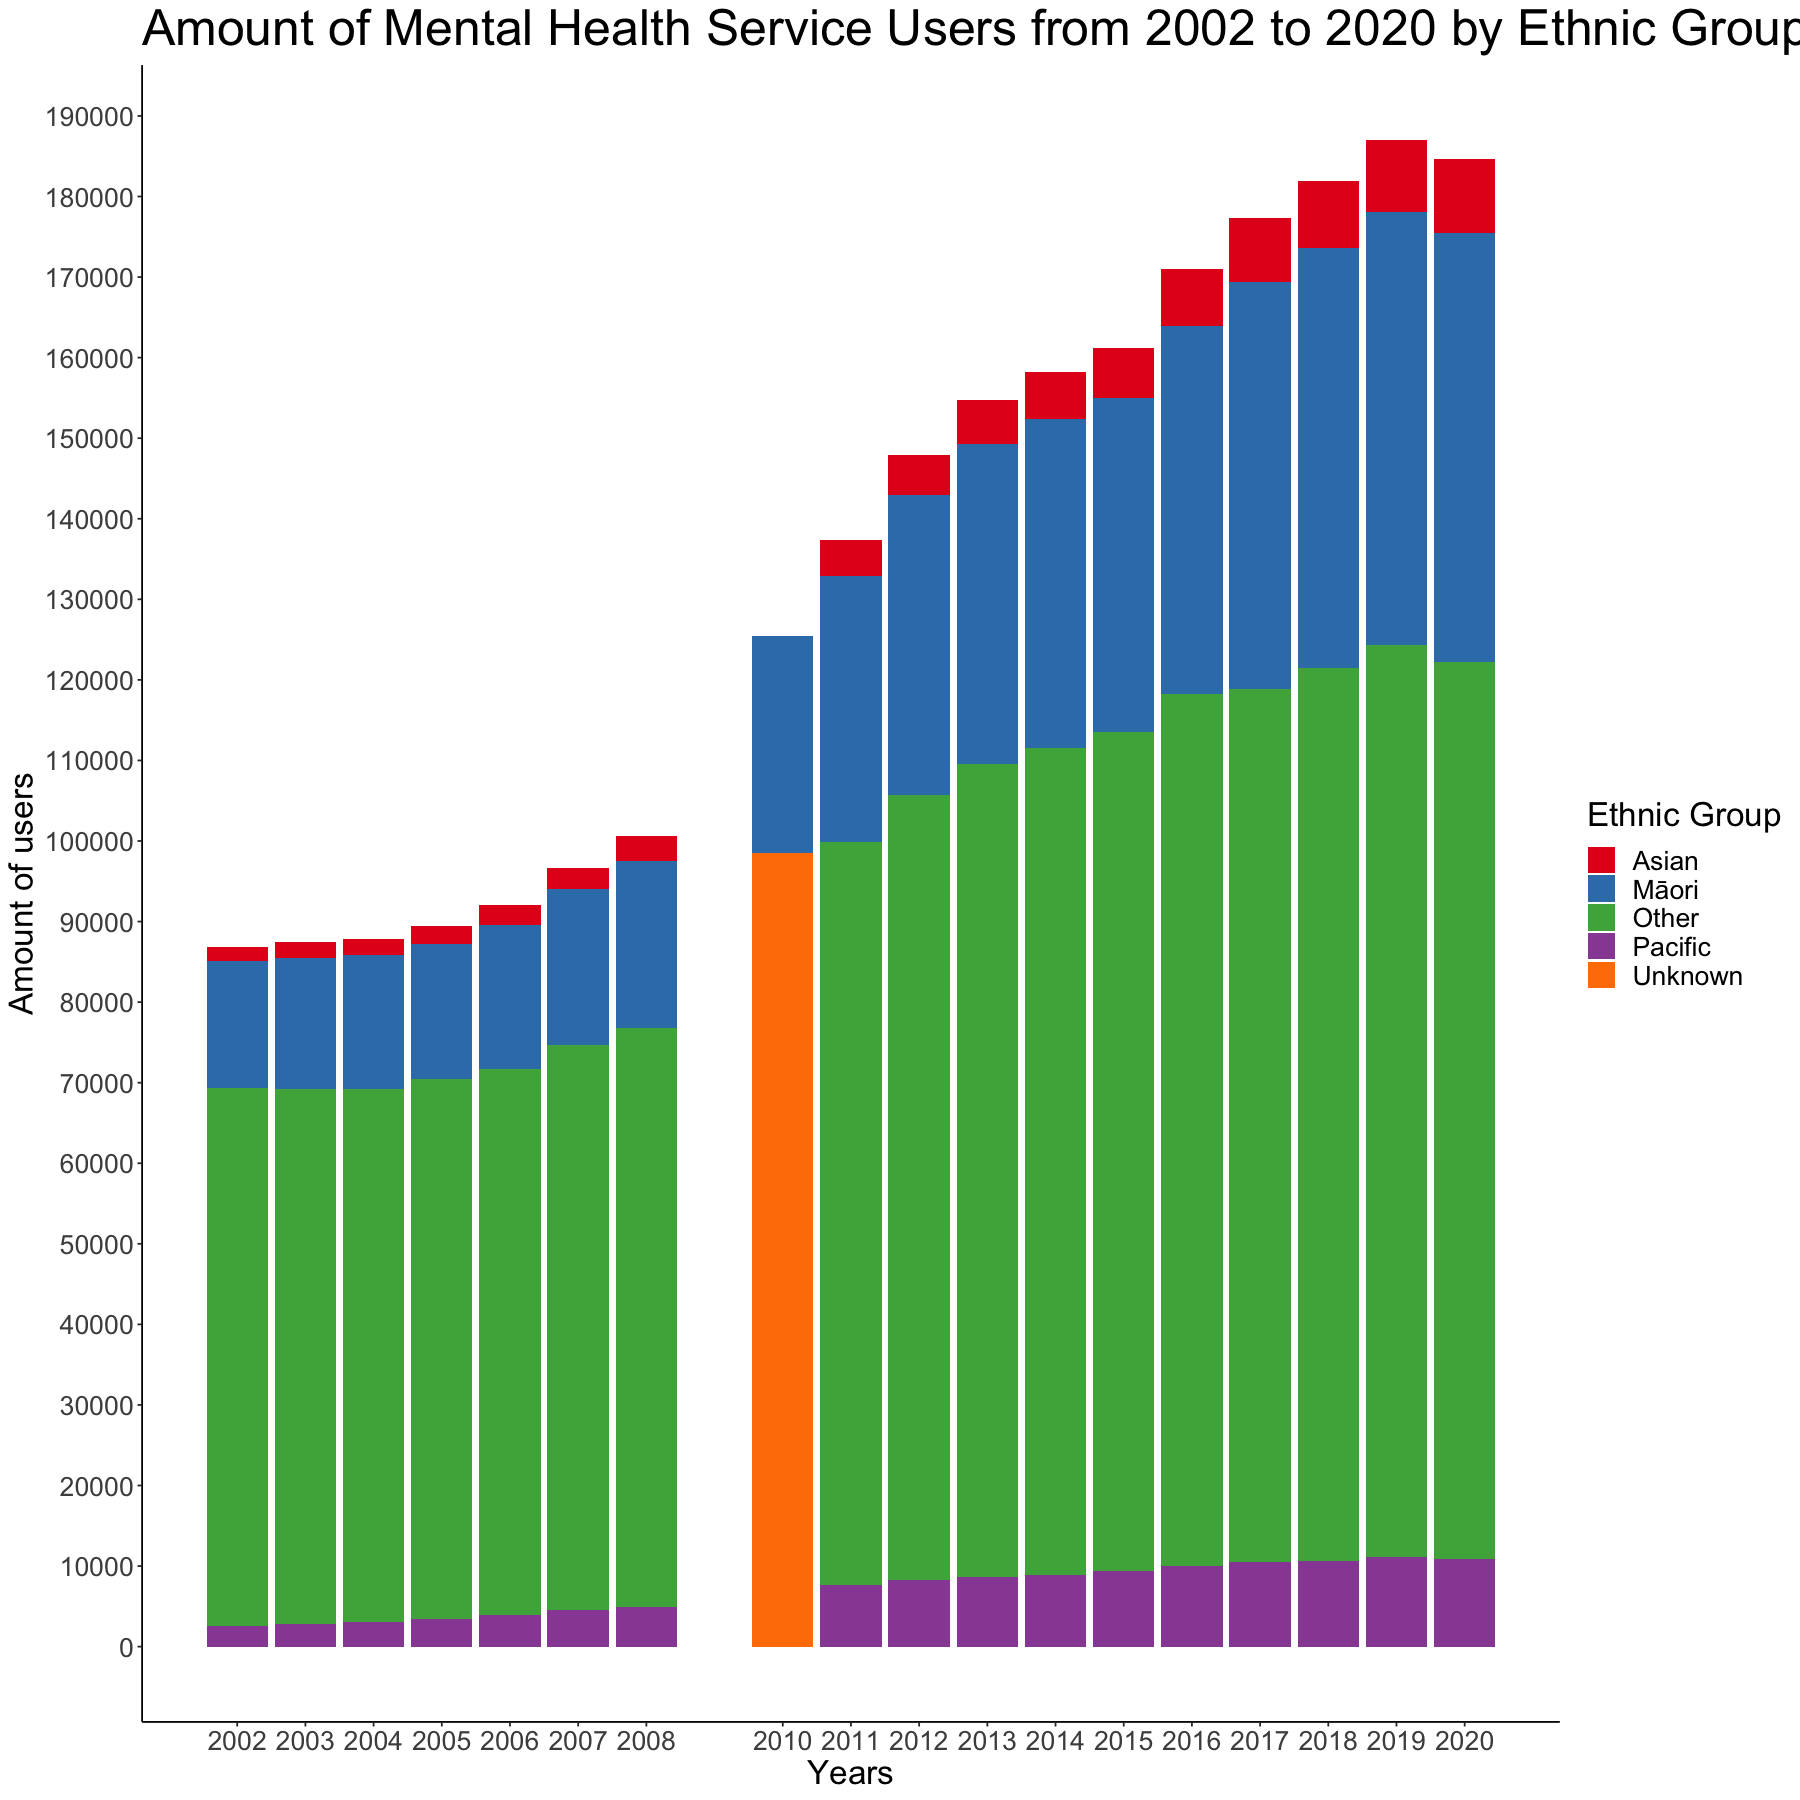

In [224]:
years <- full_clients_by_gender_ethnic_df %>% select(year) %>% distinct() # get all years for X value references
full_clients_by_gender_ethnic_df %>% group_by(year, ethnic_group) %>%  # group rows by year and ethnic group
                                     select(year, ethnic_group, amount) %>% # just get the year, ethnic group and amount of usages
                                     summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the sum amount of users (droping the last column)
                                     ggplot( aes(fill=ethnic_group, y=sum_amount, x=year)) + # creating a plot with year as X axis, amount as Y axis and filled by ethnic group
                                     geom_bar(position="stack", stat="identity") +  # setting it as a bar chart
                                     scale_x_continuous(breaks=years$year) +  # adding year for X scale 
                                     labs(x= "Years",  #adding labels for reference.
                                          y='Amount of users',
                                          fill='Ethnic Group',
                                          title='Amount of Mental Health Service Users from 2002 to 2020 by Ethnic Group') +
                                     theme_classic() + theme(plot.title = element_text(size=30),
                                                            text = element_text(size=20))  + # changing theme
                                     scale_fill_brewer(palette="Set1") +  #assigning pallete
                                     scale_y_continuous(breaks=seq(0, 2000000, 10000)) #adding propper Y axis scale.

ggsave('graphs/amount_ouf_users.png', scale=3) # saving the graph 

We can see an increase over the last 10 years and a decline in 2020 because the information gathered is based on clients seen face-to-face, so lockdown would have stopped face-to-face meetings from happening.

Also we can see that in 2010 MOH (Ministry of Health) only reported information about Maori and Non-Maori ethnicities, so we can't assume any other ethnicity. For this reason all other ethnicities are gathered in the Unknown category.


There is something notable to point out and its the fact that service usage by Asian ethnicity increased drastically over the last year.
Let's have a look at that.


Saving 21 x 21 in image



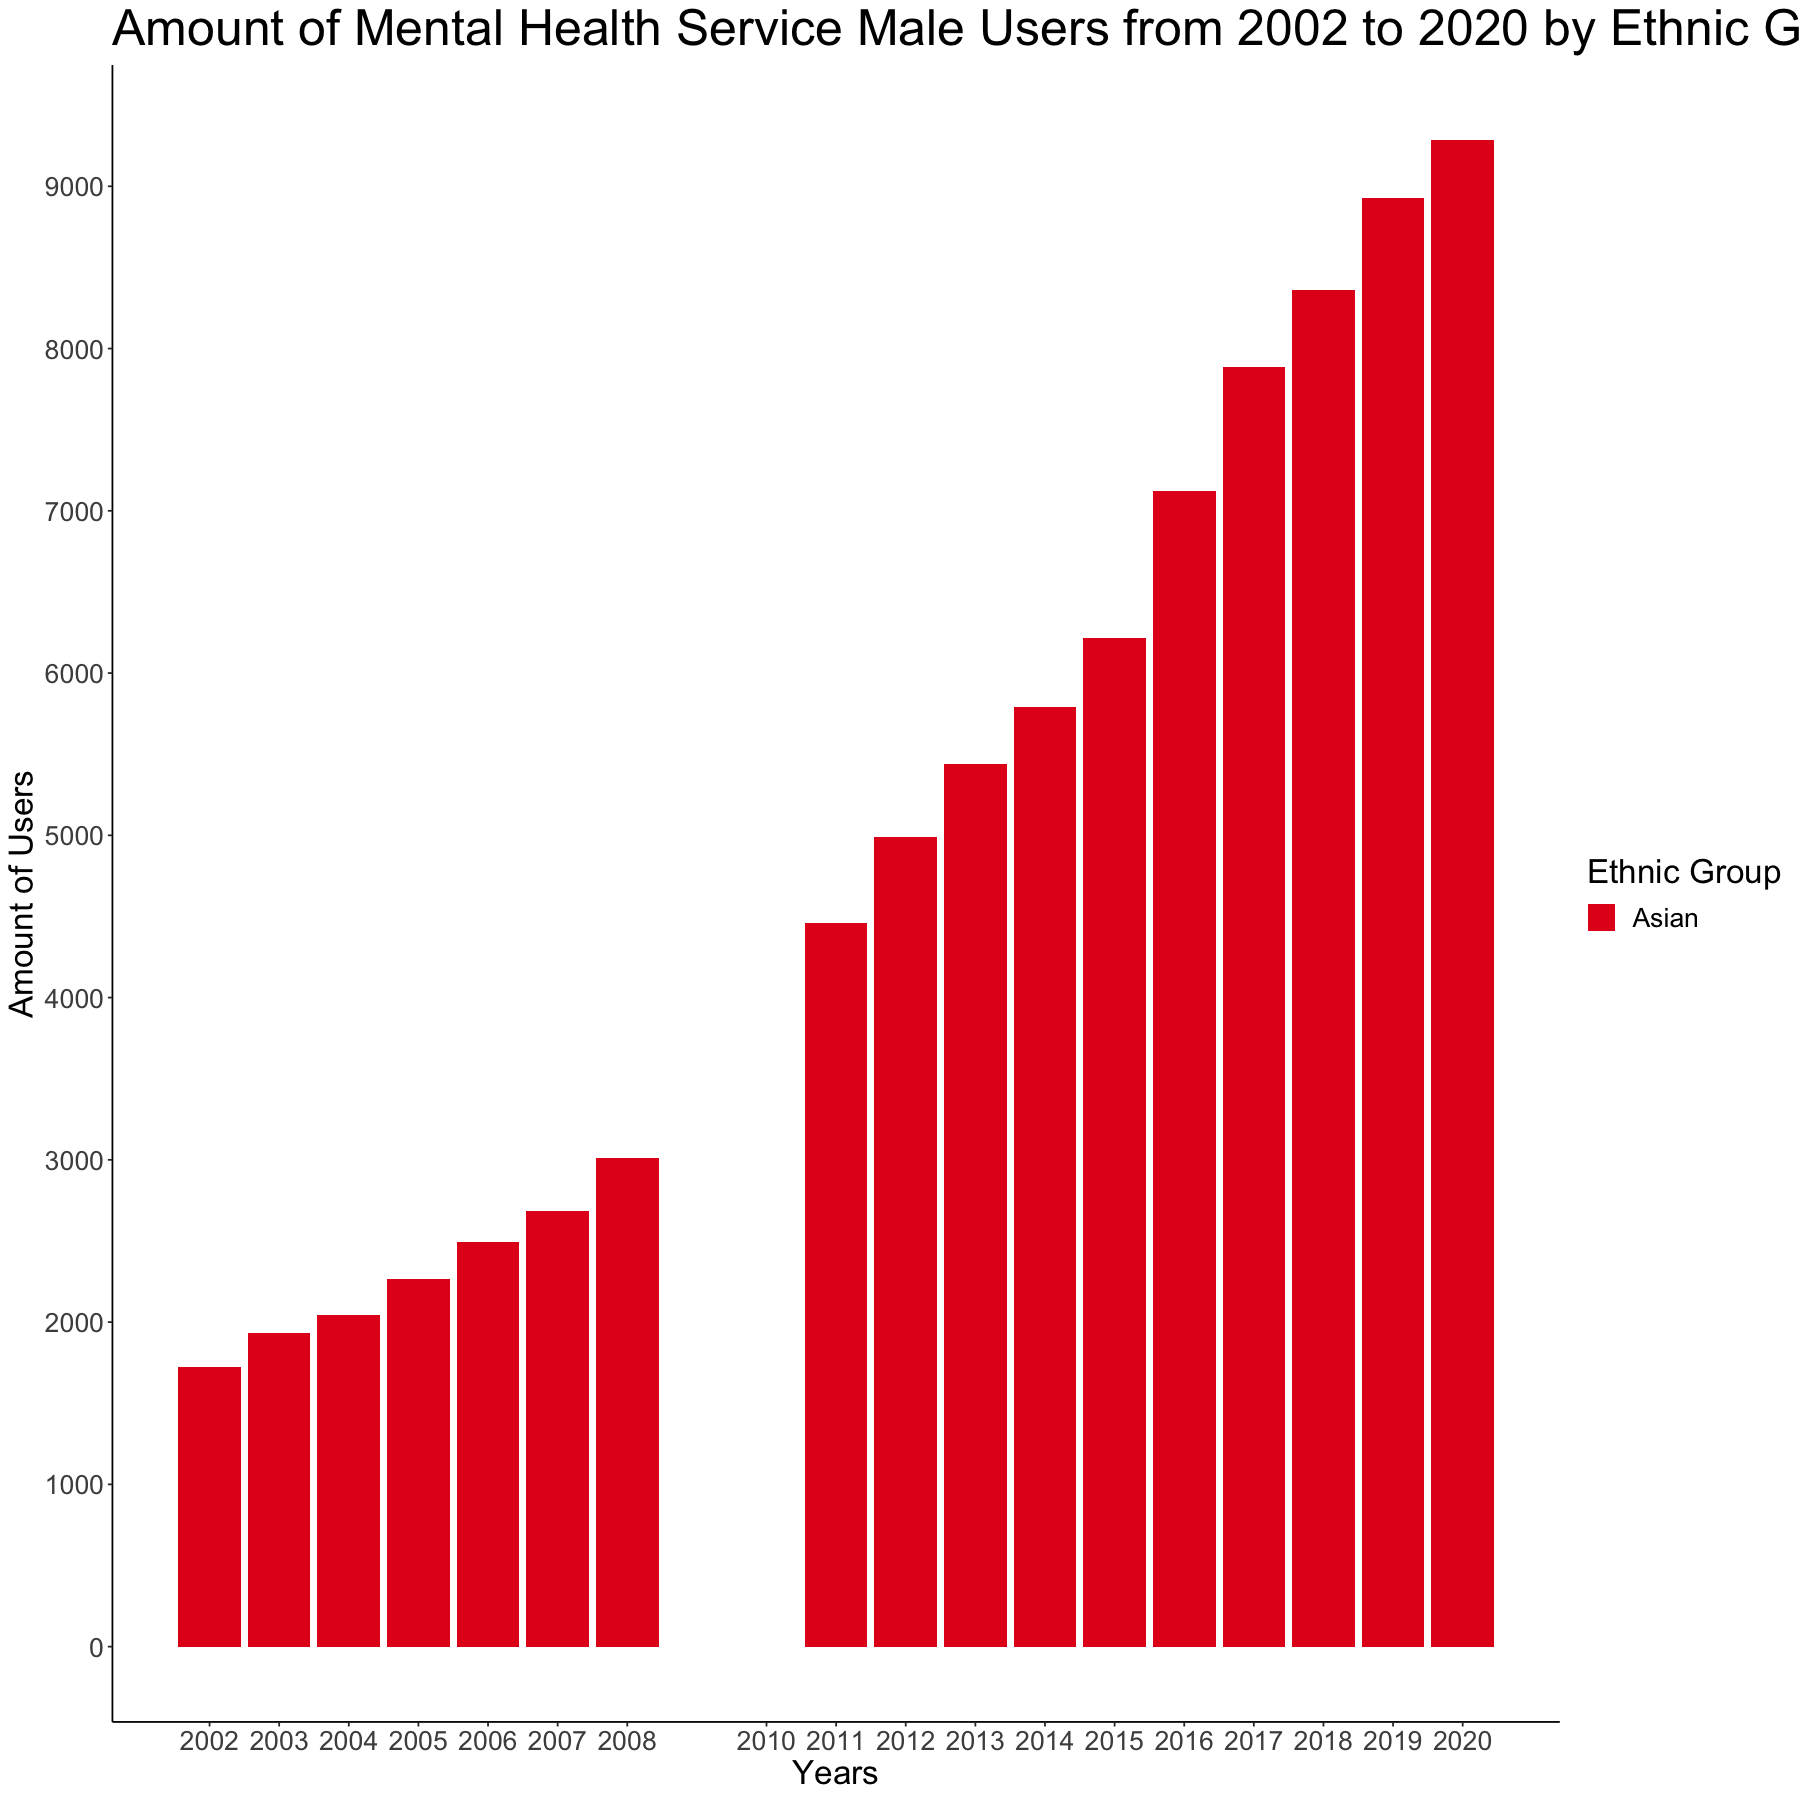

In [225]:
full_clients_by_gender_ethnic_df %>% filter(ethnic_group=="Asian") %>% # filter by asian ethnicity
                                     group_by(year, ethnic_group) %>%  # groupby year and ethnic group
                                     select(year, ethnic_group, amount) %>% # select only year, ethnic group and amount
                                     summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the sum amount of users for each year
                                     ggplot( aes(fill=ethnic_group, y=sum_amount, x=year)) + # creating a plot with year as X axis, amount as Y axis and filled by ethnic group
                                     geom_bar(position="stack", stat="identity") +   # setting it as a bar chart
                                     scale_x_continuous(breaks=years$year) +  # adding year for X scale 
                                     labs(x= "Years",  #adding labels
                                          y='Amount of Users',
                                          fill='Ethnic Group',
                                          title='Amount of Mental Health Service Male Users from 2002 to 2020 by Ethnic Group') +
                                     theme_classic() + theme(plot.title = element_text(size=30),
                                                            text = element_text(size=20))  +# changing theme
                                     scale_fill_brewer(palette="Set1") +  #assigning pallete
                                     scale_y_continuous(breaks=seq(0, 20000, 1000)) #adding propper Y axis scale.

ggsave('amount_ouf_asian_users.png', scale=3) # saving graph

We can see an increase from 3000 users in 2008 to over 9000 in 2020 , this is a huge step for the asian community.
It is important to take in account that this parameters do not take in consideration inmigration and migration over these years, it would be very interesting to compare this data with inmigration statistics.



## Users by Age group

We will have a look at service usage by age group to figure out what age groups are the most demanding over the years.

Saving 21 x 21 in image



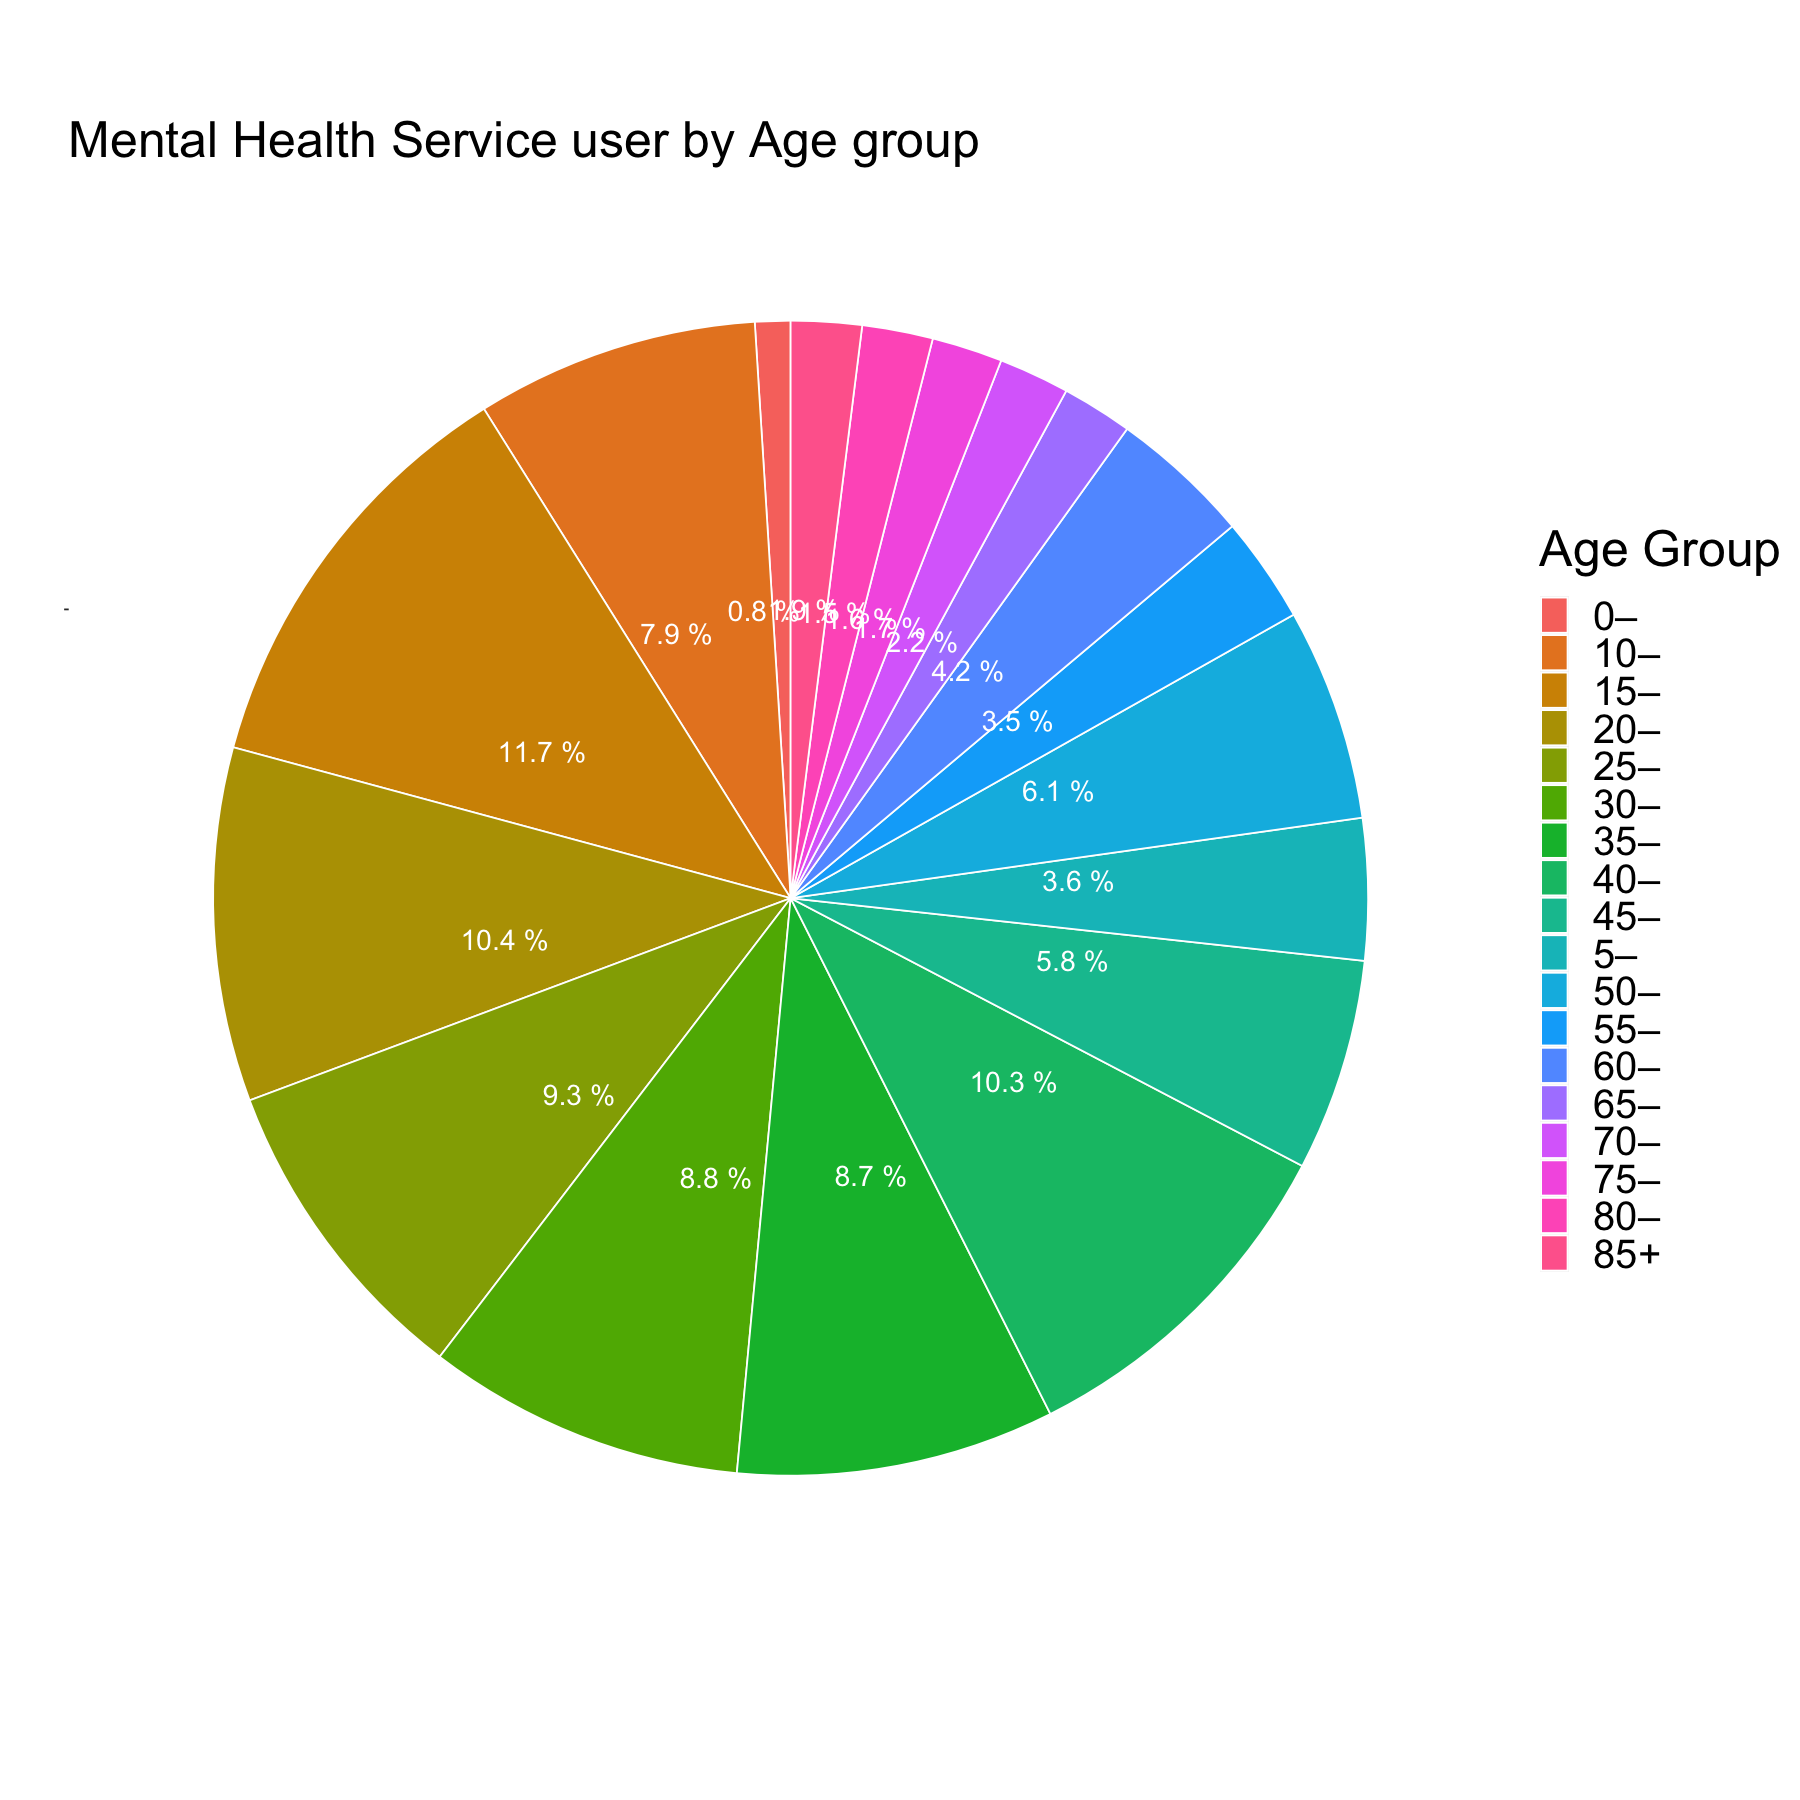

In [227]:
full_clients_by_gender_ethnic_df %>% group_by(age_group) %>%  # group by age ghroup
                                     select(age_group, amount) %>% # just get age and amount
                                     arrange(age_group) %>% # order by age_group
                                     summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the sum amount of users 
                                     ggplot( aes(x='', fill=age_group,  # creating a pie chart
                                                 y=round(sum_amount/sum(sum_amount)*100))) + # creating proportions for display.
                                     geom_bar(stat="identity", 
                                              color='white') + 
                                     geom_text(aes(x=1, #
                                                  y=sum_amount/sum(sum_amount)*100, # calculating values for labels on every slice of the pie.
                                                  label=paste(ifelse(round(sum_amount/sum(sum_amount)*100, digits=1) > 0,
                                                               round(sum_amount/sum(sum_amount)*100, digits=1), 
                                                                ),'%')),
                                              color='white', #setting color
                                              size=6,
                                              position = position_stack(vjust = 0.4)) +#setting the colors and stat for the piechart
                                     coord_polar(theta="y") + 
                                     labs(x= "", # adding labels 
                                          y="", 
                                          fill='Age Group',
                                          title='Mental Health Service user by Age group') +
                                       theme(plot.title = element_text(size=30), # adding themes
                                                            text = element_text(size=30),
                                                                     axis.text = element_text(size = 0),
                                                              panel.background = element_rect(fill = "white")
)
ggsave('graphs/age_groups.png', scale=3) # saving graph

We can see that the usage from clients of 15-45 year old gap account for most of NZ Mental Health service.


## Users by District Health Board

The following cells will wrangle the data for information about District Health Board usage.

The data has a similar shape to the other excel sheets already wrangled, but has an important difference in 2010 where the data was not released in the same format as the rest of the years.

The function **get_2010_dhb_data** from our **moh.r** package does some interesting wrangling with this. Refer to the library documentation for more information about it.




In [179]:

all_data_dhb <- get_2002_to_2008_dhb_data('mental_health2002.xls', "A20", 'A5:W26', 2002) %>% # getting legacy data from 2002 to 2008
                rbind(get_2002_to_2008_dhb_data('mental_health2004.xls', "A20", 'A5:W26', 2004)) %>% # getting 2004 data
                rbind(get_2002_to_2008_dhb_data('mental_health2005.xls', "A20", 'A5:W26', 2005)) %>% # getting 2005 data
                rbind(get_2002_to_2008_dhb_data('mental_health2006.xls', "20A", 'A5:W26', 2006)) %>%  # getting 2006 data
                rbind(get_2002_to_2008_dhb_data('mental_health2007.xls', "20B", 'A5:W26', 2007)) %>%  # getting 2007 data
                rbind(get_2002_to_2008_dhb_data('mental_health2008.xls', "A20", 'A5:W26', 2008)) %>% # getting 2008 data
                rbind(get_2010_dhb_data('mental_health2010.xls', "T10 Nos Rates 0910 DHB",'A2:C24'))%>%  # getting custom 2010 data
                rbind(get_2011_onwards_dhb_data('mental_health2011.xlsx', 'Table12', 'A4:V4', 'A5:v25', 2011)) %>%  # getting 2011 data onwards
                rbind(get_2011_onwards_dhb_data('mental_health2012.xlsx', 'table12', 'A4:V4', 'A5:v25', 2012)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2013.xlsx', 'table12', 'A4:V4', 'A5:v25', 2013)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2014.xlsx', 'table12', 'A4:V4', 'A5:v25', 2014)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2015.xlsx', 'table12', 'A4:V4', 'A5:v25', 2015)) %>%
                rbind(get_2011_onwards_dhb_data('mental_health2016.xlsx', 'table12', 'A3:V3', 'A5:v24', 2016)) %>%
                rbind(get_2011_onwards_dhb_data('mental_health2017.xlsx', 'table12', 'A4:V4', 'A5:v24', 2017)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2018.xlsx', 'table12', 'A4:V4', 'A5:v24', 2018)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2019.xlsx', 'table12', 'A4:V4', 'A5:v24', 2019)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2020.xlsx', 'table12', 'A4:V4', 'A5:v24', 2020))


all_data_dhb %>% sample_n(10)

dhb,Northland,Waitemata,Auckland,Counties Manukau,Waikato,Lakes,Bay of Plenty,Tairawhiti,Taranaki,⋯,Hutt,Wairarapa,Nelson Marlborough,West Coast,Canterbury,South Canterbury,Otago,Southland,Unknown,year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Capital and Coast,30,60,87,48,77,28,39,82,63,⋯,826,125,57,4,92,8,0,47,17,2012
Taranaki,5,19,18,22,42,7,16,1,4604,⋯,12,3,8,3,14,0,0,11,33,2019
Waitemata,476,15459,5990,5321,355,119,144,28,40,⋯,44,11,32,5,88,8,0,72,65,2011
Auckland,0,0,10838,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2010
Hawke's Bay,3,7,14,5,19,17,30,15,17,⋯,19,6,6,0,3,0,4,3,0,2004
Whanganui,3,7,6,9,16,5,6,1,36,⋯,7,3,6,0,3,0,0,5,4,2014
Auckland,57,795,6117,320,80,22,36,6,21,⋯,8,2,4,2,18,0,16,4,32,2005
Otago,14,17,29,6,9,3,9,0,9,⋯,14,2,30,10,64,44,5599,128,12,2002
West Coast,0,3,5,3,7,3,4,0,1,⋯,1,2,40,1422,85,4,0,16,1,2011


Data is displayed in a wide format of a 2 way table. Some wrangling was done to standarize names and values over the years.

This table shows on the DHB column where the service took place, while the rest of the columns indicate where is the users domicile set.
Let's mutate this dataset into a long format for better usage.

In [180]:
all_data_dhb <- all_data_dhb %>% mutate(across(everything(), as.character)) # turn all fields into characters
longer_dhb_data <- all_data_dhb %>% pivot_longer(cols=-c('dhb', 'year'), names_to = "origin", values_to = "amount") # pivot all the fields that are not year and dhb to origin.
names(longer_dhb_data)[names(longer_dhb_data) == 'dhb'] <- "destination" # change dhb column name to destination
longer_dhb_data <- longer_dhb_data %>% select(origin, destination, amount, year)  # get the origin, destination and amount columns
longer_dhb_data <- longer_dhb_data %>% mutate(amount=as.integer(amount)) # change the amount column to an integer.

Now we can have a look at the long version of the dataset

In [228]:
longer_dhb_data %>% sample_n(10)

origin,destination,amount,year
<chr>,<chr>,<int>,<chr>
Northland,Waitemata,777,2016
Hutt,Whanganui,7,2015
Whanganui,Capital and Coast,228,2020
Southland,Capital and Coast,60,2014
Unknown,West Coast,11,2008
Unknown,Counties Manukau,36,2012
Capital and Coast,Nelson Marlborough,47,2002
Whanganui,South Canterbury,0,2010
Nelson Marlborough,Otago,29,2005


In [229]:
write.csv(longer_dhb_data, 'clients_by_dhb.csv') # save the dataset 

## Visualization

We need to see how canterbury is doing in terms of mental health use, we will create a timeseries to see how the usage changed over time.

Saving 21 x 21 in image



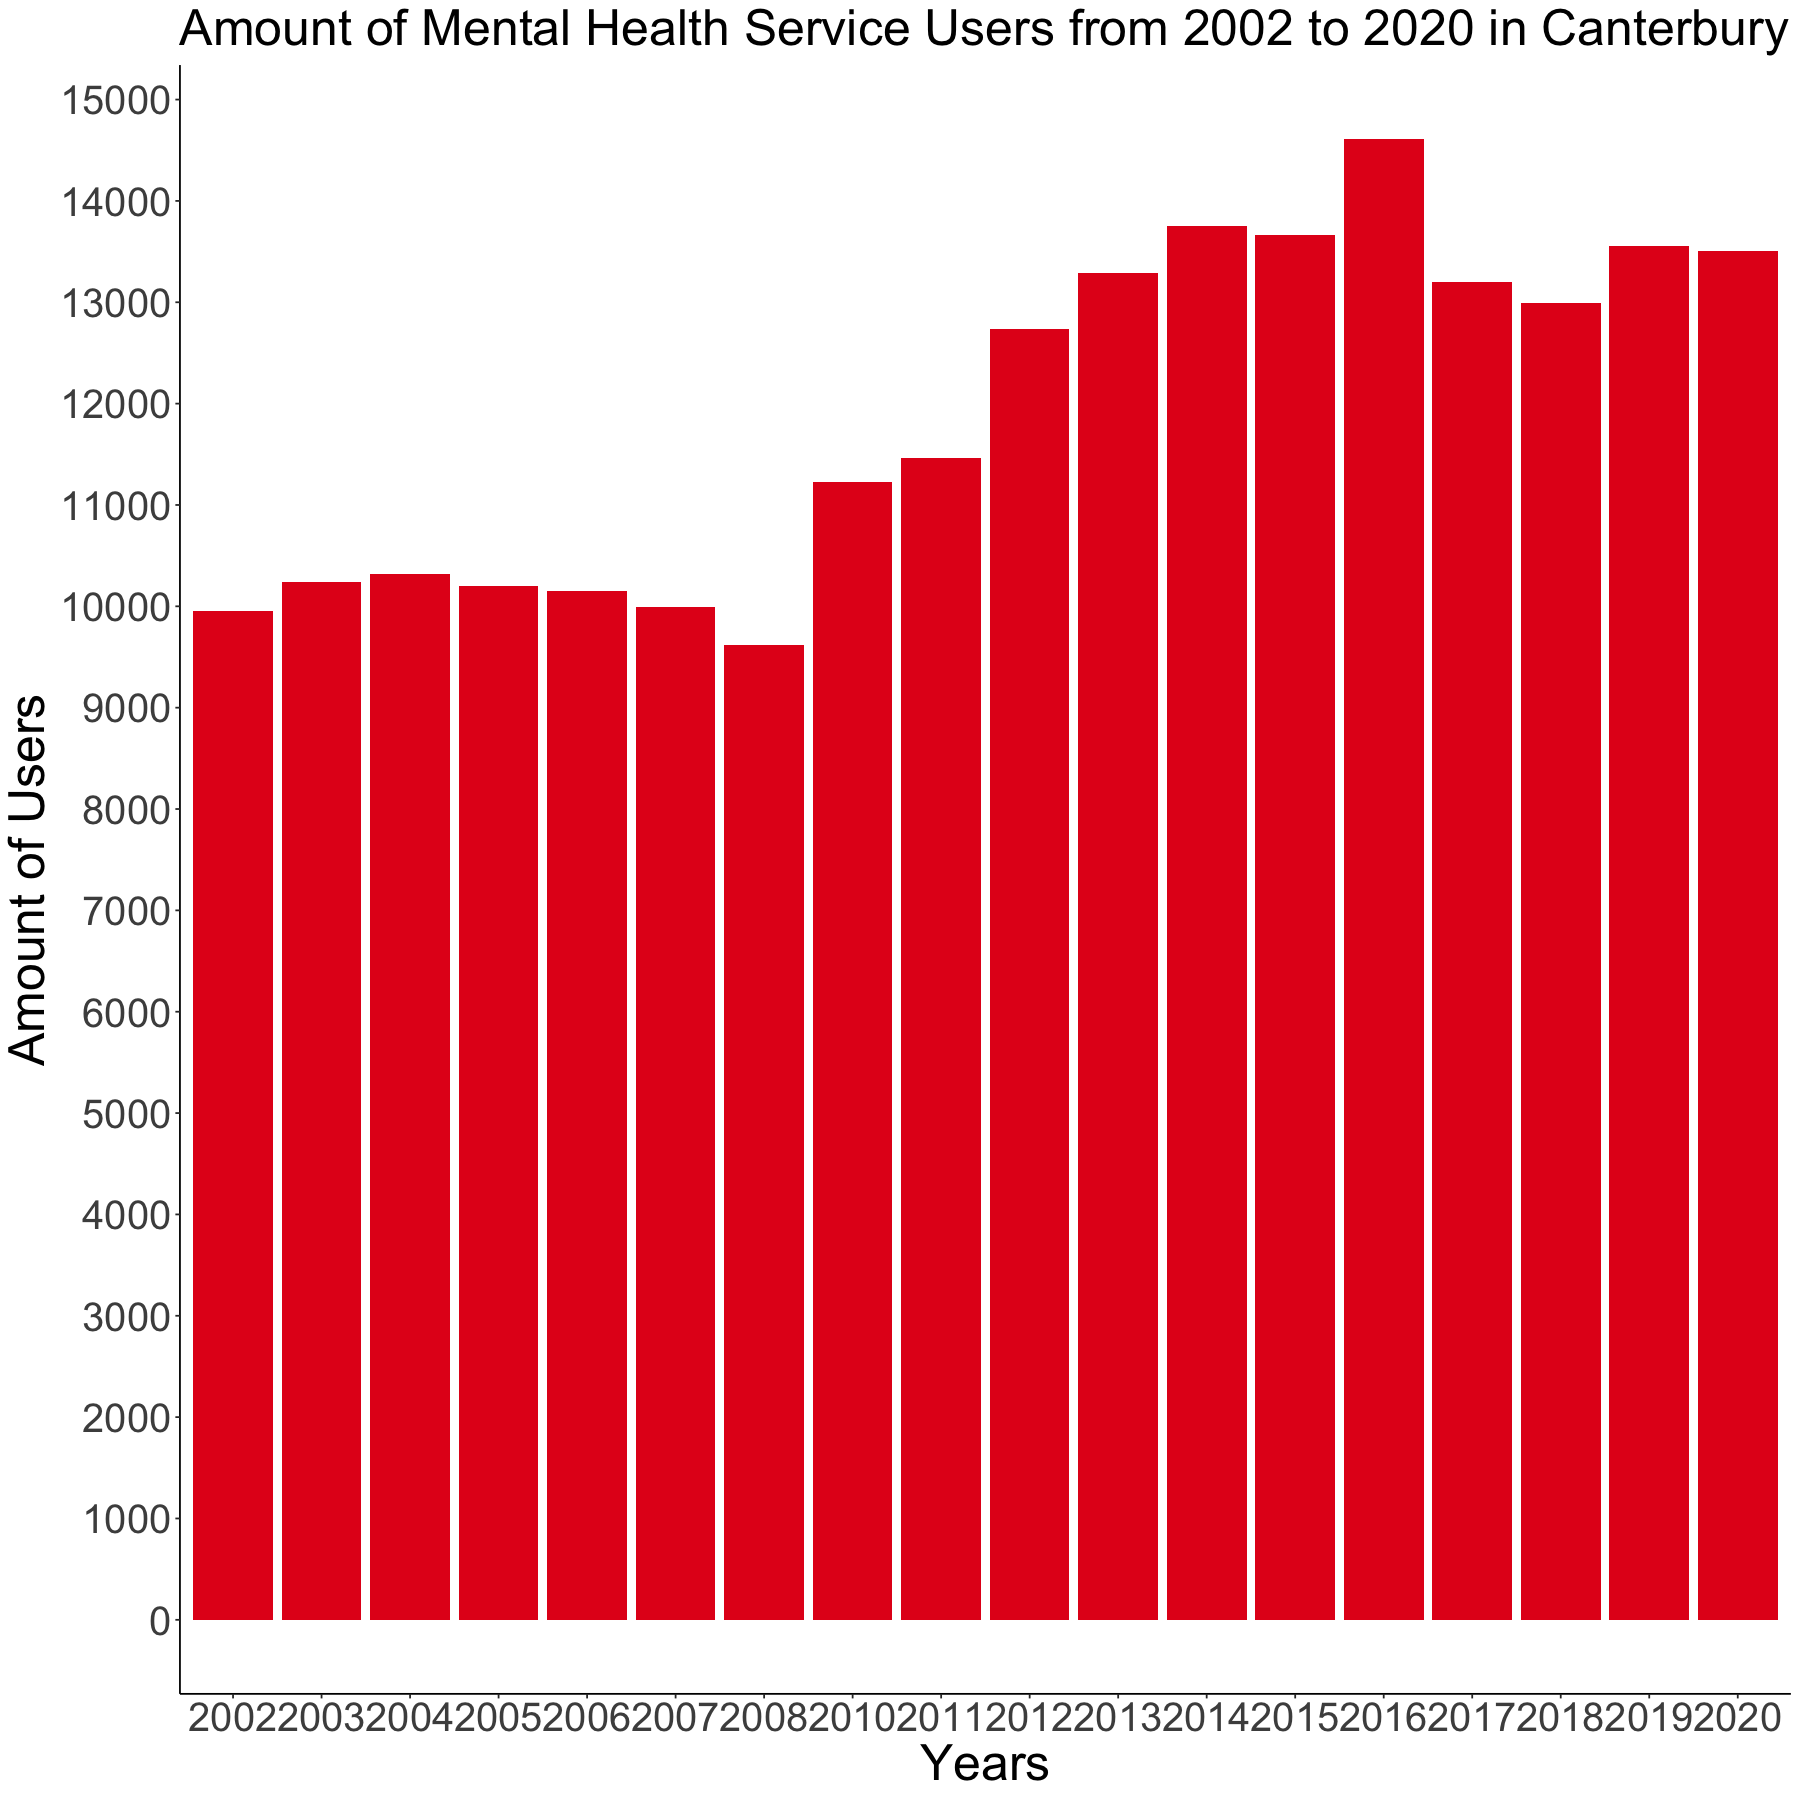

In [230]:
longer_dhb_data %>% filter(destination!='Unknown', destination=='Canterbury') %>% # filter dataset for canterbury and remove unknown destinations 
                    group_by(destination, year) %>% # group by destination and year
                    select(destination, year,  amount) %>% # select destination year and amount
                    summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # get the sum amount of users .
                    ggplot(aes(fill=destination, y=sum_amount, x=year)) +  # create a bar chart with X value as year , Y value as amount and fill it with destination
                    geom_bar(position="stack", stat="identity") +  # add bars
                    labs(x= "Years",  # create labels
                      y='Amount of Users',
                      fill='DHB',
                      title='Amount of Mental Health Service Users from 2002 to 2020 in Canterbury') +
                    theme_classic() + theme(plot.title = element_text(size=30), #add theme
                                          text = element_text(size=30))  +
                    scale_fill_brewer(palette="Set1") +  #assigning pallete 
                    scale_y_continuous(breaks=seq(0, 20000, 1000)) + # add proper y scale values
                    guides(fill=FALSE) # remove guides


ggsave('graphs/canterbury.png', scale=3) # save plot

We can see an increase after 2011 that could be related to the 2011 earthquakes, but once again the whole nation's mental health service had a increased amount of users during those years.

It could be interesting to compare this information with Canterbury's population over the following years after the eartquake and see if the possible decrease in population and the increase on mental heatlh service usage make this graph give us more information.


## Users by Service Type.

The following cells will wrangle the data for information about usage by Service Type.

Service type refers to the unit that takes care of the service: drug addiction, alcohol addiction, maternity, etc.


In [249]:
full_colnames <- colnames(get_service_data('mental_health2002.xls', "A9",  'B5:V131', 2002)) # get column names from 2002 dataset


service_data <- get_service_data('mental_health2002.xls', "A15",  'B5:V93', 2002) %>%  # gets data from 2002 onwards.
                rbind(get_service_data('mental_health2003.xls', "A15",  'B5:V93', 2003)) %>% 
                rbind(get_service_data('mental_health2004.xls', "A15",  'B5:V93', 2004)) %>% 
                rbind(get_service_data('mental_health2005.xls', "A15",  'B5:V93', 2005)) %>% 
                rbind(get_service_data('mental_health2006.xls', "15A",  'B5:V93', 2006, full_colnames)) %>% 
                rbind(get_service_data('mental_health2007.xls', "15B",  'B5:V93', 2007, full_colnames)) %>% 
                rbind(get_service_data('mental_health2008.xls', "A15",  'B5:V93', 2008, full_colnames)) %>%
                rbind(get_service_data('mental_health2011.xlsx', "Table23",  'A4:U73', 2011, full_colnames)) %>%
                rbind(get_service_data('mental_health2012.xlsx', "table23",  'A4:U73', 2012, full_colnames)) %>%
                rbind(get_service_data('mental_health2013.xlsx', "table23",  'A4:U73', 2013, full_colnames)) %>% 
                rbind(get_service_data('mental_health2014.xlsx', "table23",  'A4:U73', 2014, full_colnames)) %>% 
                rbind(get_service_data('mental_health2015.xlsx', "table23",  'A4:U73', 2015, full_colnames)) %>% 
                rbind(get_service_data('mental_health2016.xlsx', "table23",  'A3:U43', 2016, full_colnames)) %>% 
                rbind(get_service_data('mental_health2017.xlsx', "table23",  'A4:U73', 2017, full_colnames)) %>%
                rbind(get_service_data('mental_health2018.xlsx', "table23",  'A4:U73', 2018, full_colnames)) %>%
                rbind(get_service_data('mental_health2019.xlsx', "table23",  'A4:U73', 2019, full_colnames)) %>% 
                rbind(get_service_data('mental_health2020.xlsx', "table23",  'A4:U73', 2020, full_colnames)) 



In [250]:
service_data %>% sample_n(10)

activity,gender,0–4,5–9,10–14,15–19,20–24,25–29,30–34,35–39,⋯,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80–84,85+,year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Intellectual disability dual diagnosis team,Female,0,0,0,9,24,20,35,34,⋯,47,27,26,10,8,3,0,0,0,2007
Kaupapa Māori tamariki and rangatahi (child and youth) mental health services,Male,0,4,18,13,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2006
Co-existing Problems Team,Female,0,14,195,180,141,136,119,89,⋯,77,71,49,19,4,6,1,0,1,2019
Alcohol and Drug Team,Male,8,54,1520,3963,4486,4331,3617,3134,⋯,2787,2194,1336,673,356,141,45,20,4,2016
Eating disorder team,Male,0,0,2,2,2,1,0,2,⋯,1,3,0,0,1,0,0,0,0,2005
Alcohol and Drug Team,Female,7,36,819,1746,1866,1611,1640,1770,⋯,1512,981,501,288,153,61,23,14,3,2012
Residential/Accommodation Team,Male,8,5,34,209,386,330,282,288,⋯,308,277,246,206,96,43,26,6,5,2016
Community Skills Enhancement Team,Male,0,1,3,129,250,358,367,442,⋯,390,347,217,132,47,22,11,9,3,2011
Other,Female,0,2,20,74,65,51,77,55,⋯,48,37,31,31,28,31,41,43,48,2007


This data is shown in a wide format, so we will get it into a long format for ease of use.

In [251]:
long_col_name <- service_data %>% select(ends_with("-"), ends_with('+')) %>% names()
service_data <- service_data %>% pivot_longer(!c(activity, gender, year), names_to="age_group", values_to="amount")
service_data %>% sample_n(10)


activity,gender,year,age_group,amount
<chr>,<chr>,<dbl>,<chr>,<chr>
Intellectual disability dual diagnosis team,Female,2003,60–64,14
Forensic Team,Male,2012,40–44,433
Psychogeriatric team,Male,2003,55–59,23
Maternal Mental Health Team,Female,2017,25–29,1348
Inpatient team,Male,2006,0–4,3
Specialist psychotherapy team,Male,2002,40–44,22
Inpatient team,Female,2004,0–4,3
Residential team,Male,2004,0–4,0
Maternal Mental Health Team,Female,2011,70–74,0


Let's do some extra clean up

In [253]:
service_data <- service_data %>% filter(activity!='Total') %>% mutate(activity=tolower(activity))  # remove total categories and make activities lower for naming conventions
service_data <- service_data %>% mutate(amount=as.integer(amount)) # turn amount colum into an integer.
service_data %>% sample_n(1) # get a sample

activity,gender,year,age_group,amount
<chr>,<chr>,<dbl>,<chr>,<int>
maternal mental health team,Female,2017,70–74,0


## Visualizations

One of the main points in mental health has ben alcohol and drug abuse in the last few years, we will gather this information into a timeseries for further analysis.

Saving 21 x 21 in image



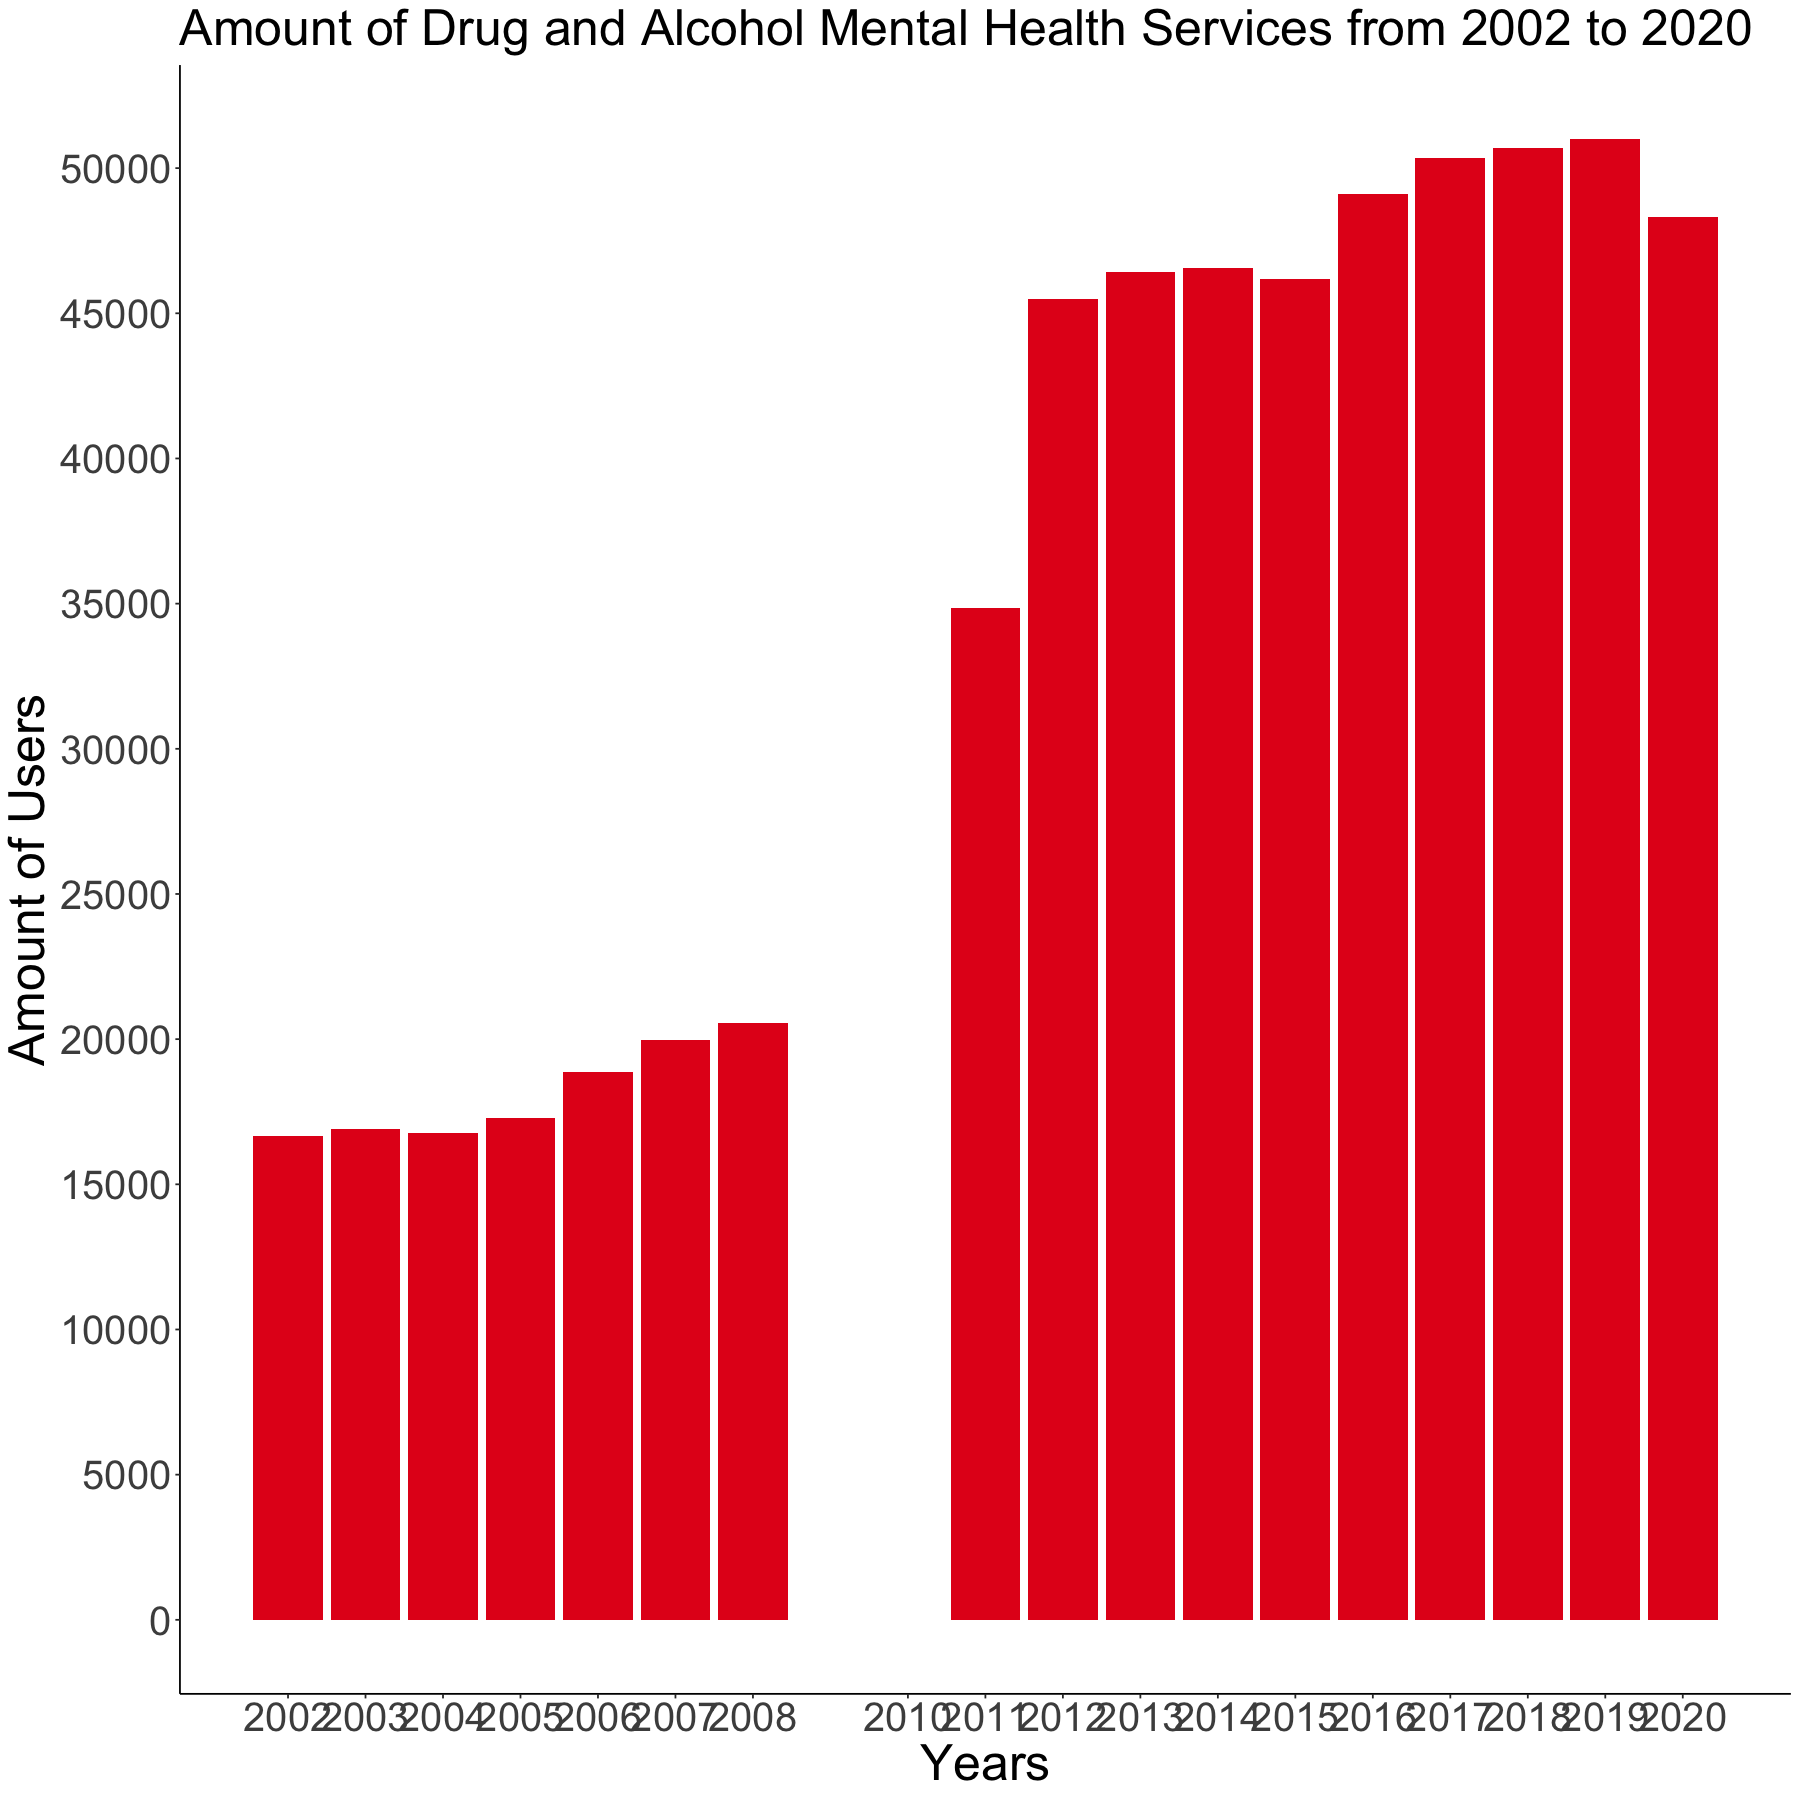

In [256]:
service_data %>% filter(activity=='alcohol and drug team') %>% # filter alcohol and drug team
                 group_by(year, activity) %>%  # group by year and activity
                 select(year, activity, amount) %>% # just get year activity and amount
                 summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the sum amount of users
                 ggplot( aes(fill=activity, y=sum_amount, x=year)) +  
                 geom_bar(position="stack", stat="identity") + 
                 scale_x_continuous(breaks=years$year) + # adding propper X axis scaling 
                 labs(x= "Years",  # getting labels
                      y='Amount of Users',
                      fill='Service',
                      title='Amount of Drug and Alcohol Mental Health Services from 2002 to 2020') +
                      theme_classic() + theme(plot.title = element_text(size=30), # adding theme
                                          text = element_text(size=30))  +
                 scale_fill_brewer(palette="Set1") +  #assigning pallete
                 scale_y_continuous(breaks=seq(0, 200000, 5000)) +  # adding proper Y axis scaling.
                 guides(fill=FALSE) # removing guides as this has only 1 parameter as fill.

ggsave('graphs/service.png', scale=3) # saving graph
write.csv(service_data, 'service_data.csv') # save dataset

We can see that the years after the eartquake we also have an increasing amount of users, dobling by 2011 and tripling by 2012.


In [196]:
# Data access

Data has been uploaded to Kaggle and can be accessed in the follo